# Happiness & Corruption

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

In [29]:
data =pd.read_csv('hcData.csv')

In [30]:
data.head()

Country  happiness_score  gdp_per_capita    family    health   freedom  \
0       Norway            7.537        1.616463  1.533524  0.796667  0.635423   
1      Denmark            7.522        1.482383  1.551122  0.792566  0.626007   
2      Iceland            7.504        1.480633  1.610574  0.833552  0.627163   
3  Switzerland            7.494        1.564980  1.516912  0.858131  0.620071   
4      Finland            7.469        1.443572  1.540247  0.809158  0.617951   

   generosity  government_trust  dystopia_residual continent  Year  \
0    0.362012          0.315964           2.277027    Europe  2015   
1    0.355280          0.400770           2.313707    Europe  2015   
2    0.475540          0.153527           2.322715    Europe  2015   
3    0.290549          0.367007           2.276716    Europe  2015   
4    0.245483          0.382612           2.430182    Europe  2015   

   social_support  cpi_score  
0             0.0         88  
1             0.0         91  
2             0.0         79  
3             0.0         86  
4             0.0         90

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


In [45]:
data.describe()

happiness_score  gdp_per_capita      family      health     freedom  \
count       792.000000      792.000000  792.000000  792.000000  792.000000   
mean          5.473310        0.929217    0.504998    0.648691    0.427016   
std           1.124726        0.385774    0.552736    0.232261    0.148003   
min           2.566900        0.000000    0.000000    0.000000    0.000000   
25%           4.590750        0.644242    0.000000    0.510070    0.325433   
50%           5.485500        0.994544    0.000000    0.685397    0.439621   
75%           6.300500        1.228677    1.040410    0.815641    0.546280   
max           7.808700        2.096000    1.610574    1.141000    0.724000   

       generosity  government_trust  dystopia_residual         Year  \
count  792.000000        792.000000         792.000000   792.000000   
mean     0.212440          0.125720           1.379277  2017.500000   
std      0.121660          0.109032           1.075276     1.708904   
min      0.000000          0.000000           0.000000  2015.000000   
25%      0.125784          0.052862           0.000000  2016.000000   
50%      0.197000          0.089000           1.731948  2017.500000   
75%      0.273250          0.154250           2.236894  2019.000000   
max      0.838075          0.551910           3.602140  2020.000000   

       social_support   cpi_score  
count      792.000000  792.000000  
mean         0.609302   44.327020  
std          0.640754   19.508833  
min          0.000000   11.000000  
25%          0.000000   30.000000  
50%          0.176214   38.000000  
75%          1.268250   57.000000  
max          1.644000   91.000000

In [32]:
data.sum()

Country              NorwayDenmarkIcelandSwitzerlandFinlandNetherla...
happiness_score                                            4334.861399
gdp_per_capita                                              735.939918
family                                                       399.95805
health                                                      513.763437
freedom                                                     338.196967
generosity                                                  168.252125
government_trust                                              99.56986
dystopia_residual                                          1092.387341
continent            EuropeEuropeEuropeEuropeEuropeEuropeNorth Amer...
Year                                                           1597860
social_support                                              482.567282
cpi_score                                                        35107
dtype: object

In [33]:
data.isnull().sum()

Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64

<AxesSubplot:xlabel='happiness_score', ylabel='cpi_score'>

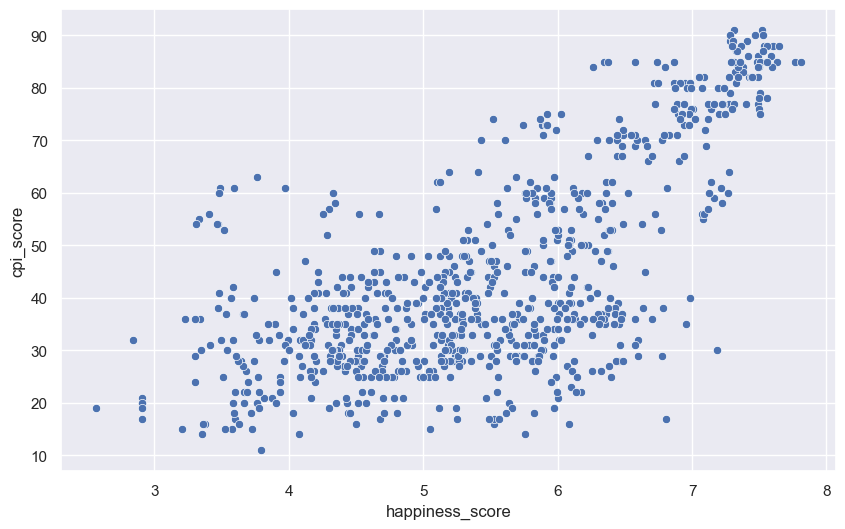

In [34]:
sns.scatterplot(x="happiness_score", y = "cpi_score", data = data)

<AxesSubplot:xlabel='happiness_score', ylabel='cpi_score'>

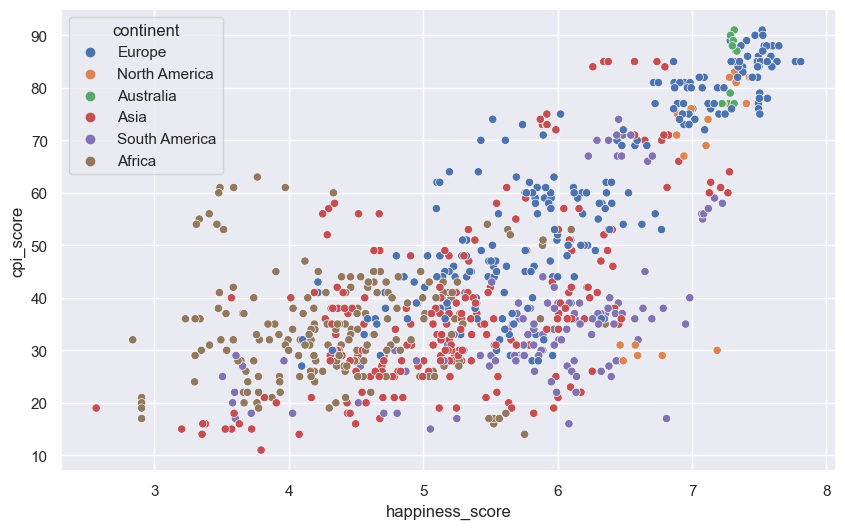

In [35]:
sns.scatterplot(x="happiness_score", y = "cpi_score", data = data, hue = "continent")

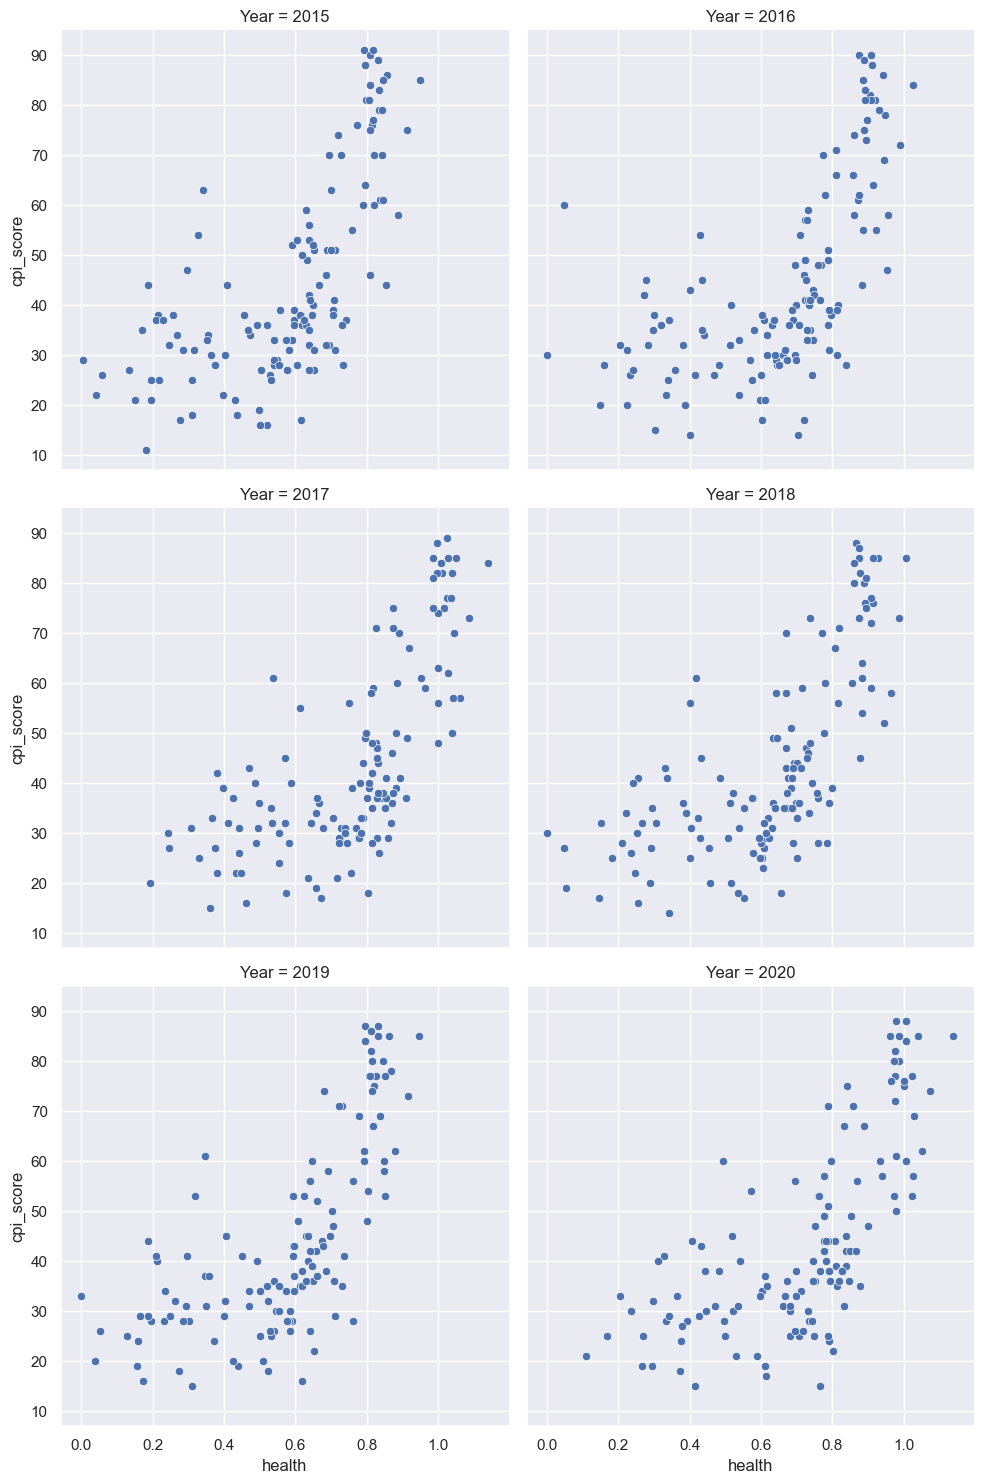

In [36]:
sns.relplot(
    data=data,
    x="health", y="cpi_score",
    palette="ch:r=-.5,l=.75", col="Year", col_wrap=2
)

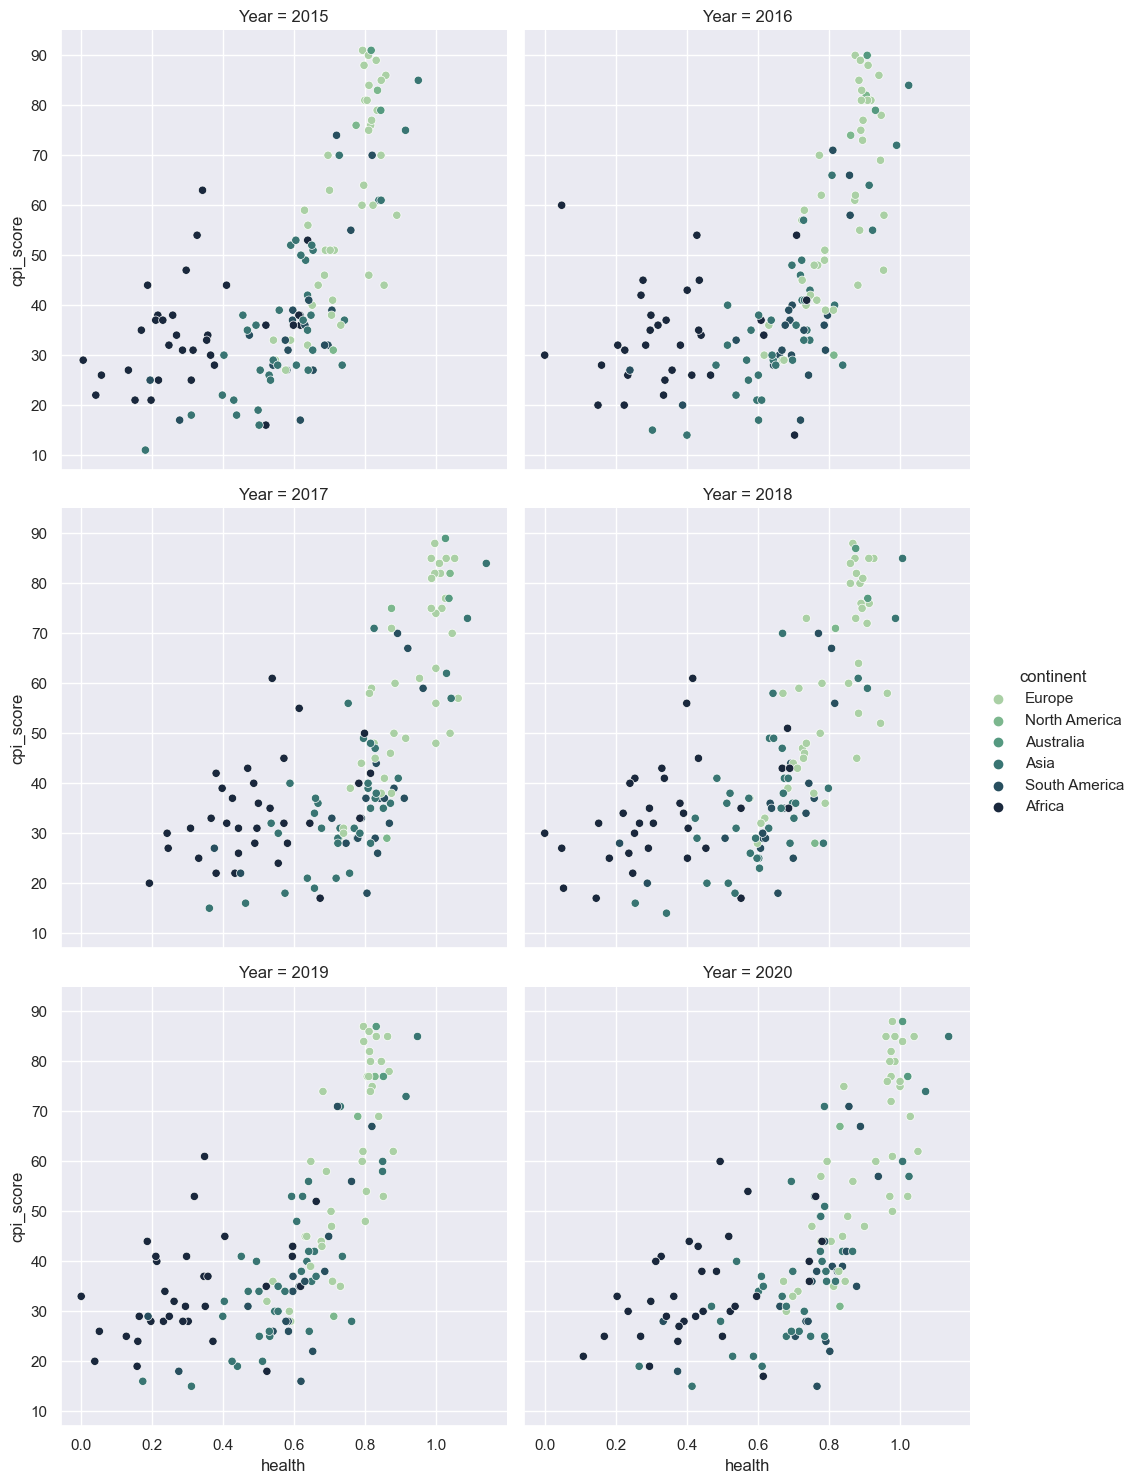

In [37]:
sns.relplot(
    data=data,
    x="health", y="cpi_score",
    palette="ch:r=-.5,l=.75", col="Year", col_wrap=2, hue= "continent"
)

In [38]:
fig = px.choropleth(data.sort_values("Year"),
                   locations= 'Country',
                   color = "health",
                   locationmode = 'country names',
                    animation_frame = 'Year'    
                   )                                   
                                             
fig.update_layout(
    title = 'Happiness score Comprasion by Countries',
    autosize=False,
    width=1000,
    height=800,)
fig.show()

In [48]:
px.scatter(data, x="happiness_score", y="continent", animation_frame="Year",
           size="gdp_per_capita", color="health", hover_name="freedom",
           size_max=35)

<AxesSubplot:>

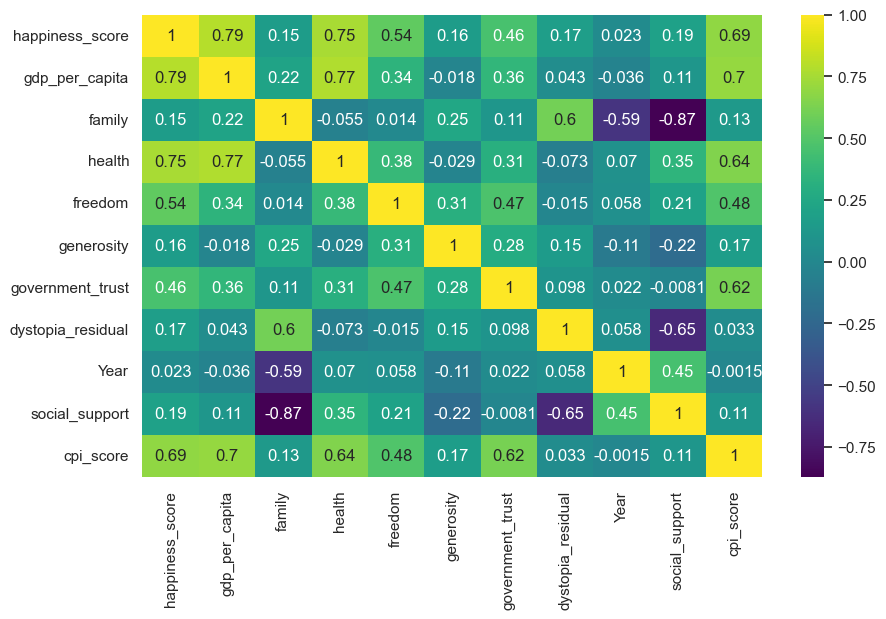

In [40]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(data.corr(), annot= True,  cmap='viridis')

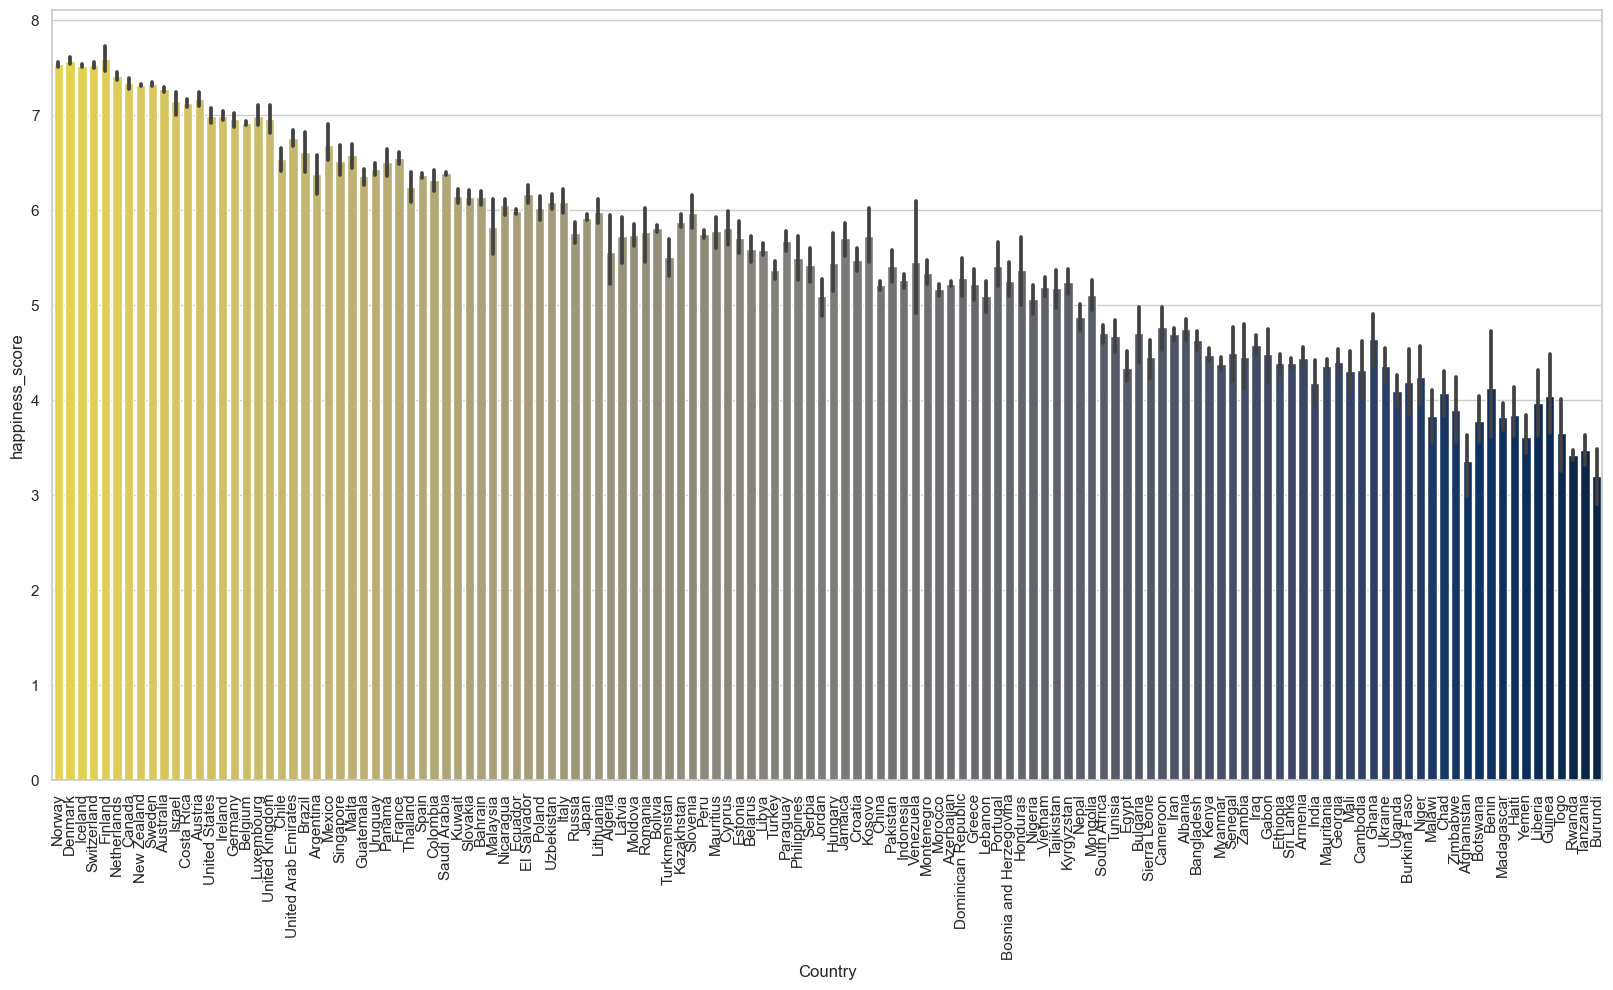

In [41]:
with sns.axes_style("whitegrid"):
    plt.subplots(figsize=(20,10))
    sns.barplot(data=data,x=data["Country"], y="happiness_score",palette=("cividis_r"))
plt.xticks(rotation=90)  
plt.show()

<AxesSubplot:xlabel='cpi_score', ylabel='continent'>

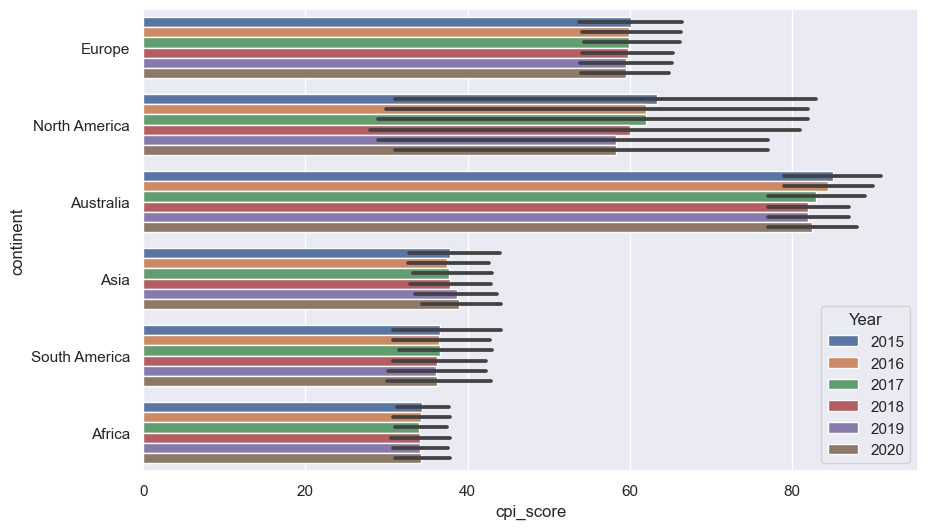

In [42]:
sns.barplot(x="cpi_score",y="continent", data=data,hue="Year")

In [43]:
data.head()

Country  happiness_score  gdp_per_capita    family    health   freedom  \
0       Norway            7.537        1.616463  1.533524  0.796667  0.635423   
1      Denmark            7.522        1.482383  1.551122  0.792566  0.626007   
2      Iceland            7.504        1.480633  1.610574  0.833552  0.627163   
3  Switzerland            7.494        1.564980  1.516912  0.858131  0.620071   
4      Finland            7.469        1.443572  1.540247  0.809158  0.617951   

   generosity  government_trust  dystopia_residual continent  Year  \
0    0.362012          0.315964           2.277027    Europe  2015   
1    0.355280          0.400770           2.313707    Europe  2015   
2    0.475540          0.153527           2.322715    Europe  2015   
3    0.290549          0.367007           2.276716    Europe  2015   
4    0.245483          0.382612           2.430182    Europe  2015   

   social_support  cpi_score  
0             0.0         88  
1             0.0         91  
2             0.0         79  
3             0.0         86  
4             0.0         90

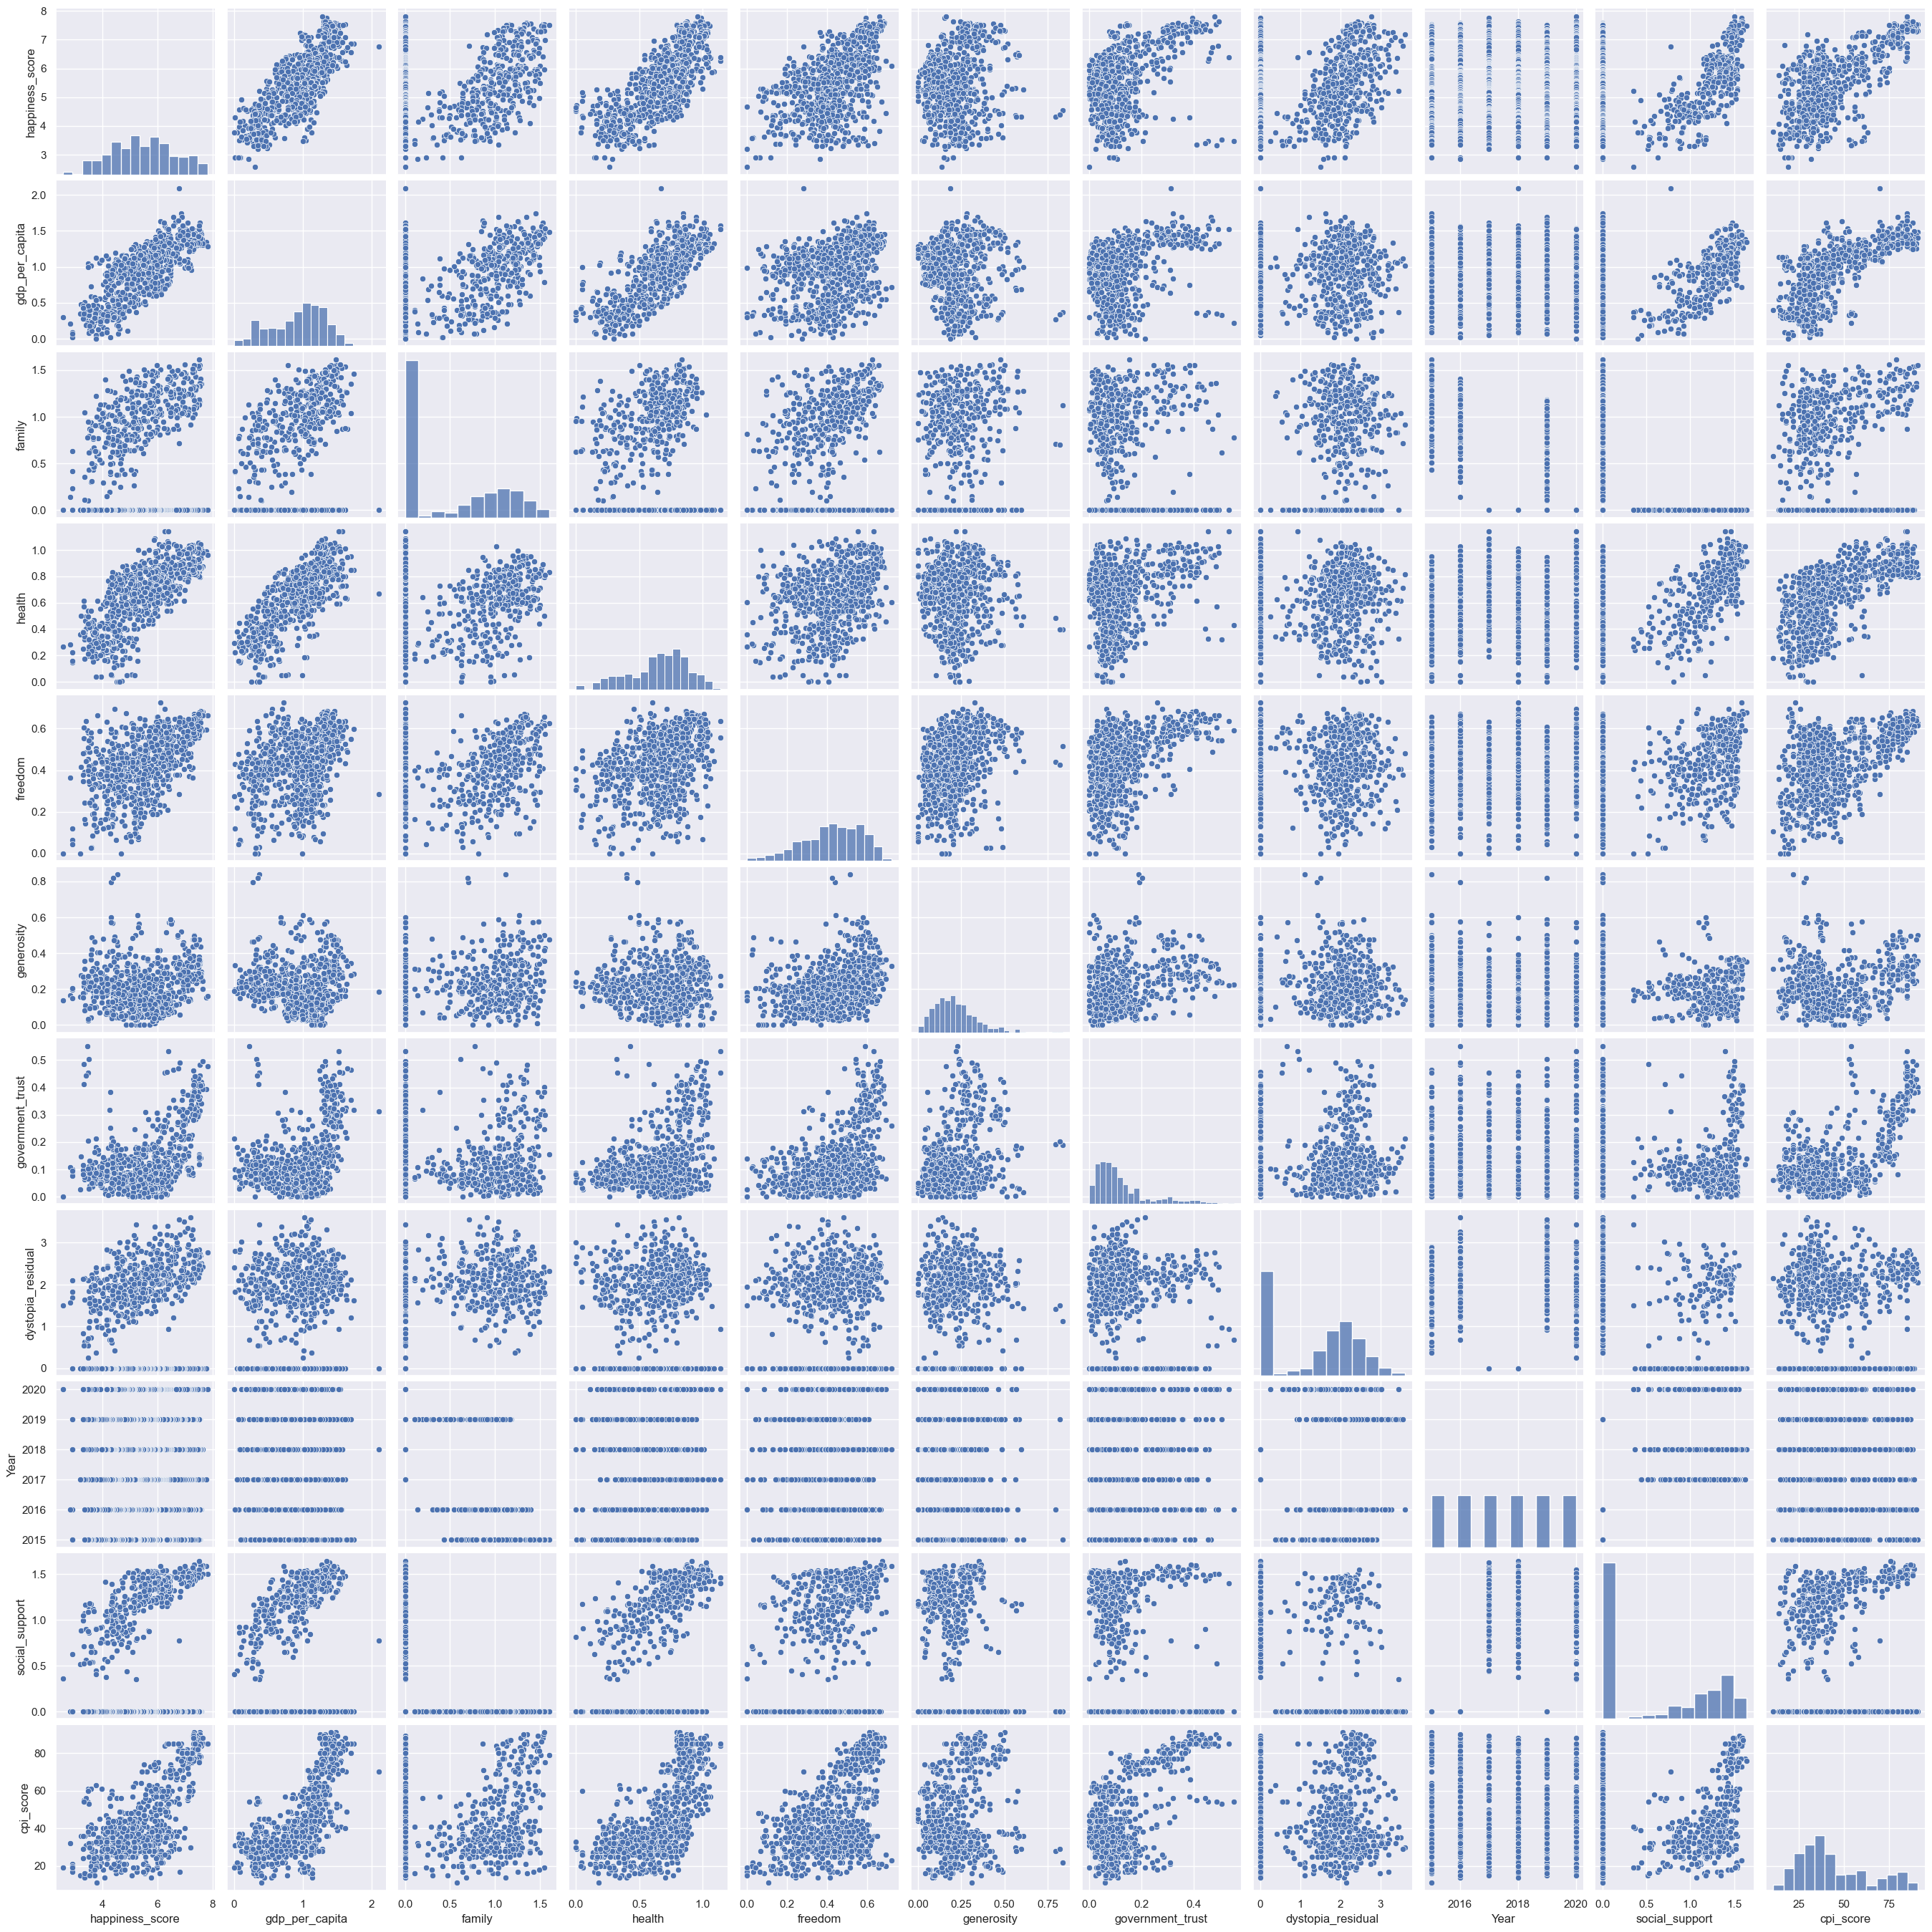

In [54]:
sns.pairplot(data)

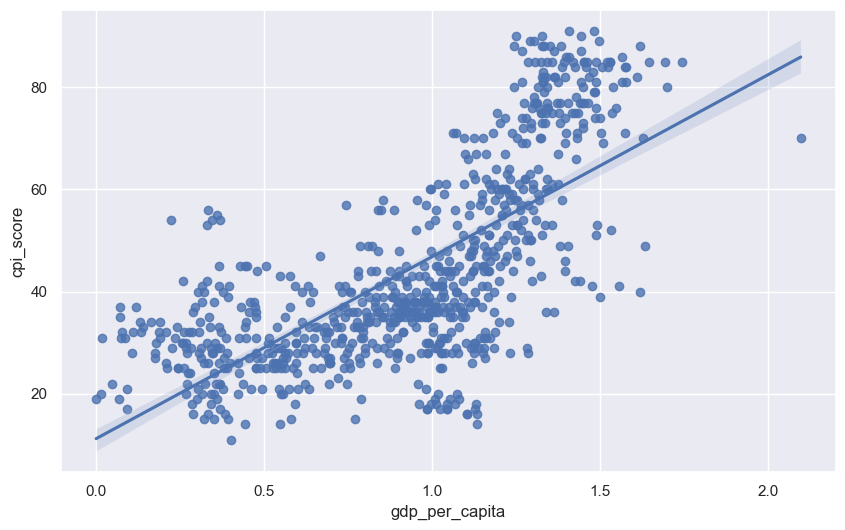

In [61]:
sns.regplot(x="gdp_per_capita", y="cpi_score", data=data);

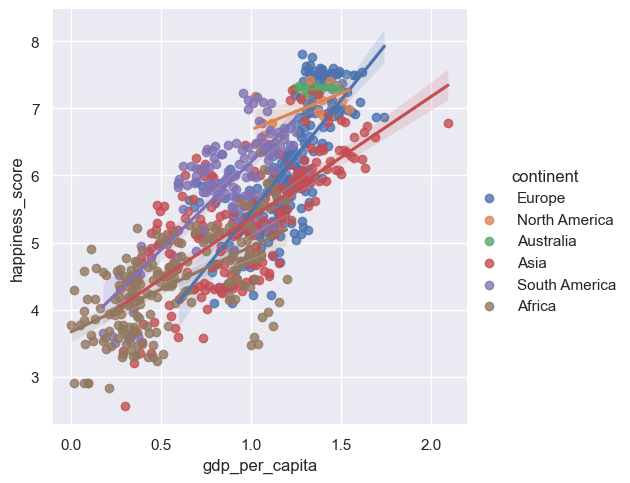

In [63]:
sns.lmplot(x="gdp_per_capita", y="happiness_score", hue="continent", data=data);

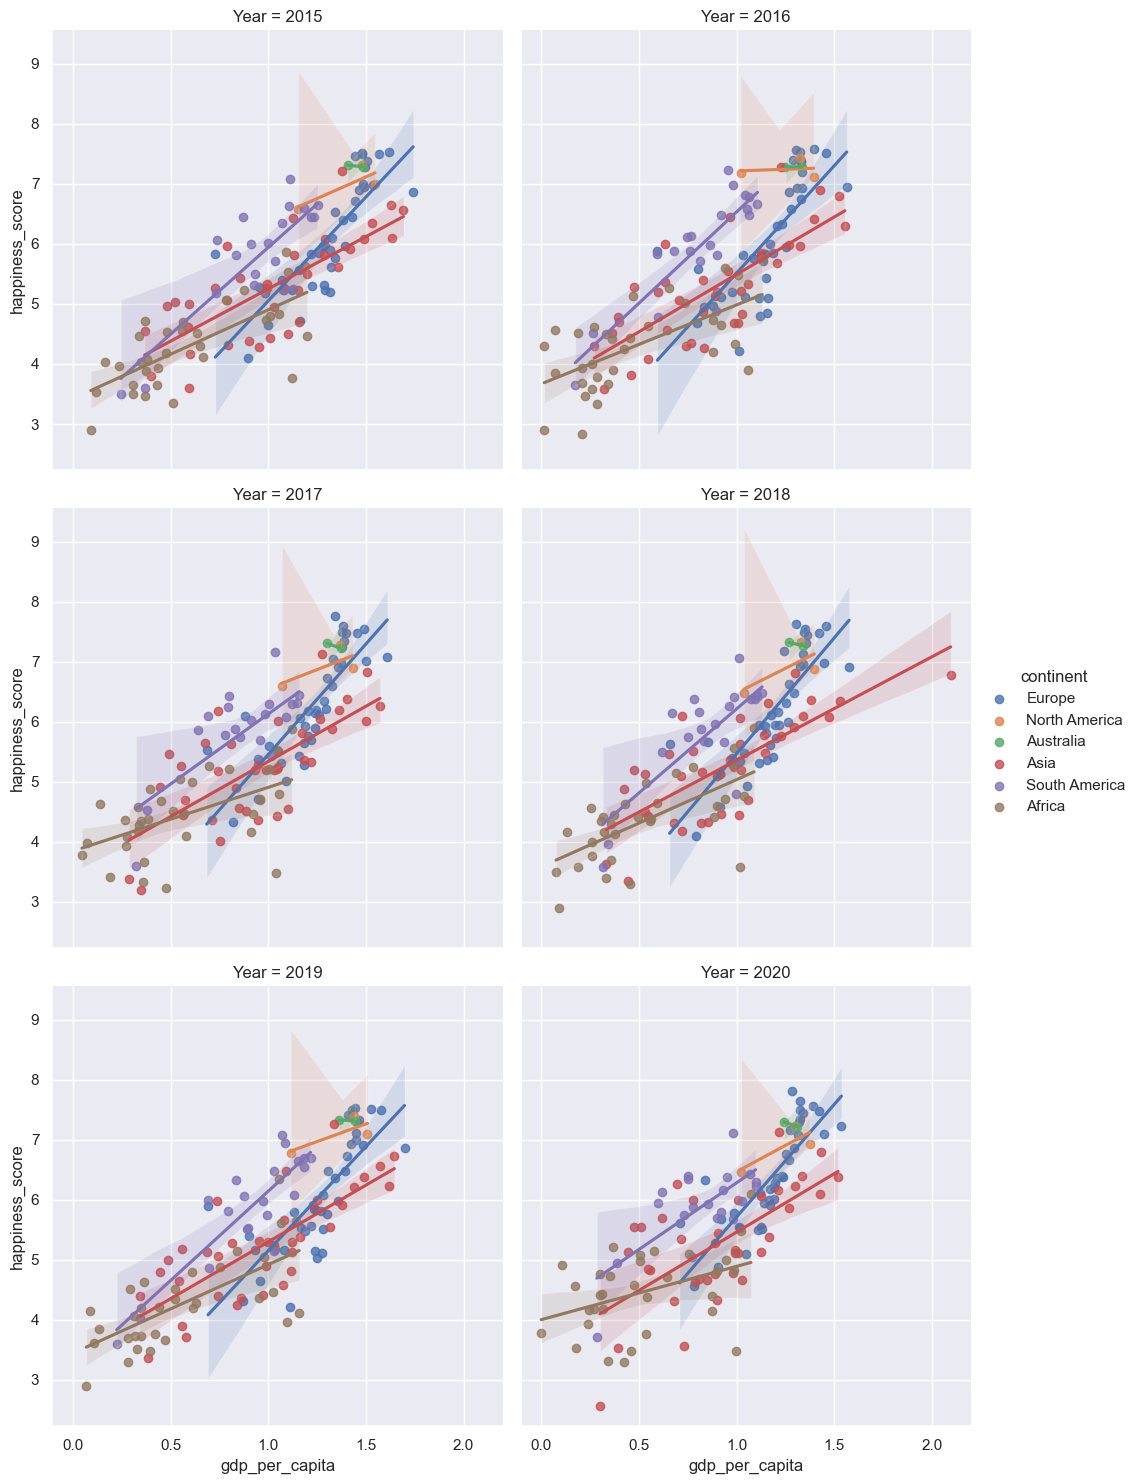

In [68]:
sns.lmplot(x="gdp_per_capita", y="happiness_score", hue="continent",col="Year",col_wrap=2, data=data);

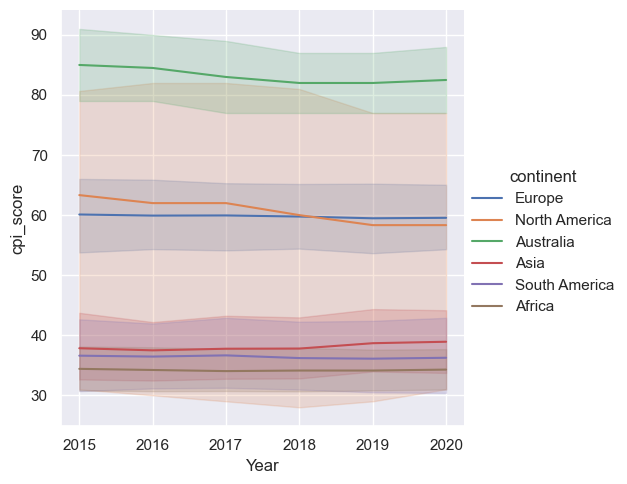

In [72]:
sns.relplot(data=data, x="Year", y="cpi_score", kind="line", hue="continent", style="")